<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB
Model Accuracy: 0.9178


C:\Users\Omkar A. Patil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Predicted Traffic Situation: [0]
Predicted Traffic Situation: heavy
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       127
           1       0.89      0.89      0.89        63
           2       0.84      0.73      0.78        66
           3       0.94      0.93      0.93       340

    accuracy                           0.92       596
   macro avg       0.90      0.89      0.89       596
weighted avg       0.92      0.92      0.92       596



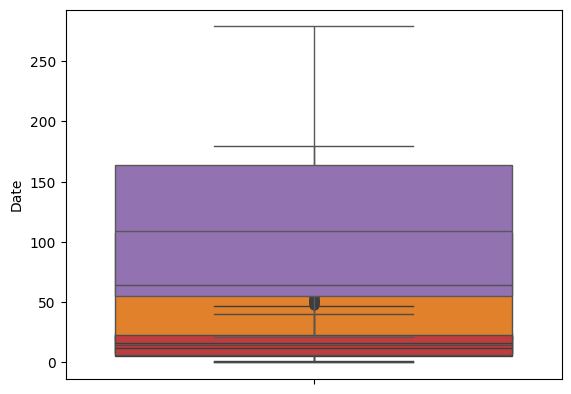

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns







In [3]:
df = pd.read_csv('Traffic.csv')

df.head()




,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [4]:
df.shape

(2976, 9)

In [5]:
df.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [6]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000


<Axes: ylabel='CarCount'>

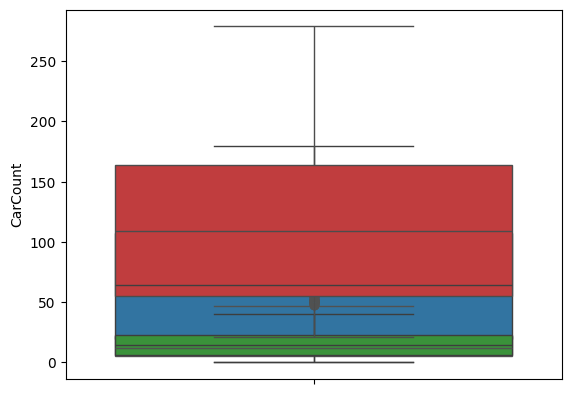

In [7]:




sns.boxplot(df['CarCount'])

sns.boxplot(df['BikeCount'])

sns.boxplot(df['TruckCount'])

sns.boxplot(df['Total'])

In [8]:
df.isnull().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

<Axes: ylabel='Date'>

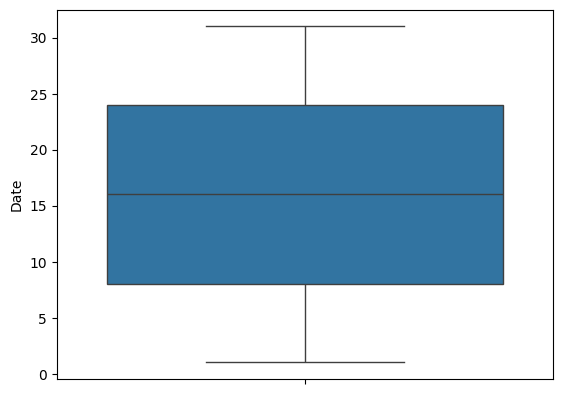

In [9]:
sns.boxplot(df['Date'])

In [10]:

from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

df1 = df.copy()



In [11]:
df1['Time'] = lb.fit_transform(df1['Time'])
df1['Day of the week'] = lb.fit_transform(df1['Day of the week'])
df1['Traffic Situation'] = lb.fit_transform(df1['Traffic Situation'])



In [12]:
df1.head()


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,16,10,5,31,0,4,4,39,2
1,18,10,5,49,0,3,3,55,2
2,20,10,5,46,0,3,6,55,2
3,22,10,5,51,0,2,5,58,2
4,24,10,5,57,6,15,16,94,3


In [13]:

df1['Traffic Situation'].unique()

df['Traffic Situation'].unique()


array(['low', 'normal', 'heavy', 'high'], dtype=object)

In [14]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [15]:

knn = KNeighborsClassifier(n_neighbors=5)


In [16]:

feature_columns = ['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']
X = df1[feature_columns]
y = df1['Traffic Situation']


In [17]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:

knn.fit(X_train, y_train)


KNeighborsClassifier()

In [19]:

y_pred = knn.predict(X_test)


In [20]:

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.9178


In [21]:

sample_input = np.array([[11*60, 738400, 0, 154, 55, 18, 41, 518]])
predicted_traffic = knn.predict(sample_input)
print("Predicted Traffic Situation:", predicted_traffic)


Predicted Traffic Situation: [0]


C:\Users\Omkar A. Patil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [22]:

predicted_label = lb.inverse_transform(predicted_traffic)
print(f"Predicted Traffic Situation: {predicted_label[0]}")


Predicted Traffic Situation: heavy


In [23]:

confusion_matrix(y_test, y_pred)


array([[126,   1,   0,   0],
       [  3,  56,   0,   4],
       [  0,   0,  48,  18],
       [  8,   6,   9, 317]])

In [24]:

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       127
           1       0.89      0.89      0.89        63
           2       0.84      0.73      0.78        66
           3       0.94      0.93      0.93       340

    accuracy                           0.92       596
   macro avg       0.90      0.89      0.89       596
weighted avg       0.92      0.92      0.92       596

